## Librerías

In [1]:
!pip install windrose     # Realiza rosa de vientos
!pip install simplekml    # Crear archivos KML

#!pip install cartopy      # Elementos cartográficos (ejemplo extra)

     |████████████████████████████████| 52 kB 1.1 MB/s 
  Created wheel for simplekml: filename=simplekml-1.3.6-py3-none-any.whl size=65876 sha256=7d05d8d3a9bf270ce187651db186c24298ee21bbe64a41df7498065ae506db1c
  Stored in directory: /root/.cache/pip/wheels/5c/ec/e6/10af1a1fb29ffca95151d4c886d6e06fc309c68f46519892de
Successfully built simplekml


In [2]:
import pandas as pd, matplotlib.pyplot as plt

## Lectura de datos

**Enlazar a tu carpeta de Google drive**

In [3]:
# Conexión a Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Seleccionar carpeta de trabajo
%cd '/content/drive/MyDrive/Aiiuda_meteo/Micro_windrose'

/content/drive/MyDrive/Aiiuda_meteo/Micro_windrose


In [6]:
# Carga de datos
df = pd.read_csv('VMT_ene2022.csv', sep=',', skiprows = 5, header = 4,             # configuración del archivo
                 usecols = [0, 1, 5, 6], names = ['Fecha', 'Hora', 'Dir', 'Vel'],  # seleccionar columnas
                 index_col = [0, 1])                                               # detallar índices

In [9]:
df.head(4)

Dir  Vel
Fecha      Hora              
2022/01/01 00:00  175.50  0.9
           01:00    6.52  0.0
           02:00  224.90  0.6
           03:00  181.50  0.4

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 737 entries, ('2022/01/01', '00:00') to ('2022/01/31', '23:00')
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Dir     737 non-null    float64
 1   Vel     737 non-null    float64
dtypes: float64(2)
memory usage: 15.1+ KB


## Rosa de viento

In [10]:
import windrose

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


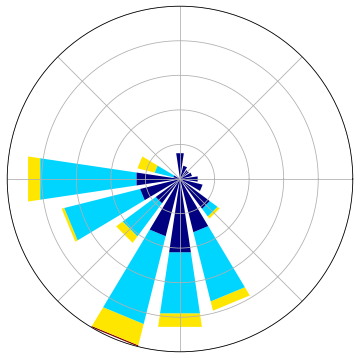

In [14]:
fig = plt.figure(figsize = (6,6), facecolor = 'none')

ax = windrose.WindroseAxes.from_ax(fig = fig)

ax.bar(direction = df['Dir'],  # dirección [°]
       var = df['Vel'],        # velocidad [m/s2] o [kts]
       nsector = 16,           # número de pétalos,
       bins = 4,               # número de intervalos de velocidad
       #bins = [0., 0.1, 4., 8.],
       opening= 0.75,          # grosor del pétalo
       edgecolor = None,       # contorno
       calm_limit = None,      # círculo de calma
       normed = True)          # normalizar (convertir valores entre 0 y 1)

ax.set_facecolor('white')      # color interior: blanco
#ax.tick_params(labelleft = False, labelbottom = False) # Desactivar ejes

ax.set_title('Rosa de viento',    # título
             fontsize = 20,       # tamaño de fuente
             color = 'darkblue')  # color

ax.legend(loc = 1)   # leyenda
plt.tight_layout()   # ajuste de bordes

# plt.savefig("Windrose.png", dpi = 300, transparent=True)
plt.savefig("Windrose2.png", dpi = 300)

In [13]:
help(ax.bar)  # Ayuda

Help on method bar in module windrose.windrose:

bar(direction, var, **kwargs) method of windrose.windrose.WindroseAxes instance
    Plot a windrose in bar mode. For each var bins and for each sector,
    a colored bar will be draw on the axes.
    
    Parameters
    ----------
    direction : 1D array
        directions the wind blows from, North centred
    var : 1D array
        values of the variable to compute. Typically the wind speeds.
    
    Other Parameters
    ----------------
    nsector : integer, optional
        number of sectors used to compute the windrose table. If not set,
        nsectors=16, then each sector will be 360/16=22.5°, and the
        resulting computed table will be aligned with the cardinals points.
    bins : 1D array or integer, optional
        number of bins, or a sequence of bins variable. If not set, bins=6
        between min(`var`) and max(`var`).
    blowto : bool, optional.
        if True, the windrose will be pi rotated, to show where the

#### Histograma

In [ ]:
df['Class'] = 0

df.loc[(df['Vel'] >= 0.0) & (df['Vel'] < 0.6), 'Class'] = 0
df.loc[(df['Vel'] >= 0.6) & (df['Vel'] < 1.2), 'Class'] = 1
df.loc[(df['Vel'] >= 1.2) & (df['Vel'] < 1.9), 'Class'] = 2
df.loc[(df['Vel'] >= 1.9) & (df['Vel'] < 2.5), 'Class'] = 3
df.loc[(df['Vel'] >= 2.5) & (df['Vel'] < 3.1), 'Class']  = 4
df.loc[(df['Vel'] >= 3.1), 'Class'] = 5

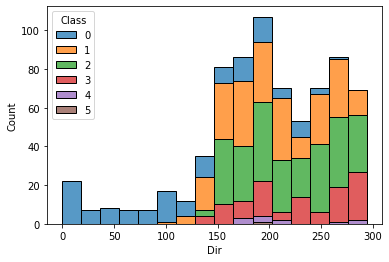

In [ ]:
import seaborn as sns
sns.histplot(data = df, x = 'Dir', bins = 16, hue = 'Class', multiple="stack", palette = 'tab10')

## Exportar a KML

In [15]:
def Deg_S(grados, minuto, seg):  # grados y minutos --> decimales (hemisferio sur)
    return (-1)*(grados + minuto*1/60 + seg*1/3600)

In [16]:
lat = Deg_S(grados = 12., minuto = 9., seg = 59.)
lon = Deg_S(grados = 76., minuto = 55., seg = 12.)
print(f'Longitud: {lon:.4f}\nLatitud: {lat:.4f}')

Longitud: -76.9200
Latitud: -12.1664


In [ ]:
import simplekml

# Creamos el objeto: kml, contiene todos los métodos necesarios para crear archivos .KML
kml = simplekml.Kml()    

kml.document.name = 'Estaciones SENAMHI'  # Nombre del documento KML

point = kml.newpoint(name = 'VMT - estación',       # Nombre del punto
                     coords = [(lon, lat)])  # Ubicación geográfica

# Ícono
point.style.iconstyle.icon.href = 'https://drive.google.com/thumbnail?id=1mAmnDBWEiyr3jSNfTEdRutiWEj31zB4x'
point.style.iconstyle.scale = 6  # Escala de la imagen

kml.save("windrose_1.kml")

print(kml.kml())  # Observar el árbol formado

<?xml version="1.0" encoding="UTF-8"?>
<kml xmlns="http://www.opengis.net/kml/2.2" xmlns:gx="http://www.google.com/kml/ext/2.2">
    <Document id="71">
        <Style id="74">
            <IconStyle id="75">
                <colorMode>normal</colorMode>
                <scale>6</scale>
                <heading>0</heading>
                <Icon id="76">
                    <href>https://drive.google.com/thumbnail?id=1mAmnDBWEiyr3jSNfTEdRutiWEj31zB4x</href>
                </Icon>
            </IconStyle>
        </Style>
        <name>Estaciones SENAMHI</name>
        <Placemark id="73">
            <name>VMT - estación</name>
            <styleUrl>#74</styleUrl>
            <Point id="72">
                <coordinates>-76.92,-12.16638888888889,0.0</coordinates>
            </Point>
        </Placemark>
    </Document>
</kml>



In [17]:
import simplekml

kml2 = simplekml.Kml()    

kml2.document.name = 'Estaciones SENAMHI 2'  # Nombre del documento KML

point = kml2.newpoint(name = 'VMT - estación', coords = [(lon, lat)]) # nuevo punto
point.style.iconstyle.icon.href = 'https://drive.google.com/thumbnail?id=1mAmnDBWEiyr3jSNfTEdRutiWEj31zB4x'
point.style.iconstyle.scale = 4    # Escala de la imagen

unalm = kml2.newpoint(name = 'unalm', coords = [(-76.951083, -12.080054)])
unalm.style.iconstyle.icon.href = 'https://drive.google.com/thumbnail?id=18suO2uxe5_7lxCaih_UgNjX8mjl_EHNu'
unalm.style.iconstyle.scale = 3

cat = kml2.newpoint(name = 'gato', coords = [(-77.142302, -12.059423)])
cat.style.iconstyle.icon.href = 'https://drive.google.com/thumbnail?id=1jaLn0Qo3G3T8CJhd4zlFEL8WCPbB7fRU'
cat.style.iconstyle.scale = 3

kml2.save("windrose_2.kml")

print(kml2.kml())  # Observar el árbol formado

<?xml version="1.0" encoding="UTF-8"?>
<kml xmlns="http://www.opengis.net/kml/2.2" xmlns:gx="http://www.google.com/kml/ext/2.2">
    <Document id="1">
        <Style id="4">
            <IconStyle id="5">
                <colorMode>normal</colorMode>
                <scale>4</scale>
                <heading>0</heading>
                <Icon id="6">
                    <href>https://drive.google.com/thumbnail?id=1mAmnDBWEiyr3jSNfTEdRutiWEj31zB4x</href>
                </Icon>
            </IconStyle>
        </Style>
        <Style id="9">
            <IconStyle id="10">
                <colorMode>normal</colorMode>
                <scale>3</scale>
                <heading>0</heading>
                <Icon id="11">
                    <href>https://drive.google.com/thumbnail?id=18suO2uxe5_7lxCaih_UgNjX8mjl_EHNu</href>
                </Icon>
            </IconStyle>
        </Style>
        <Style id="14">
            <IconStyle id="15">
                <colorMode>normal</colorMode>
   

## Rosa de viento sobre mapa

Importante: Google Colaboratory no soporta este proceso, lo mejor es usar Jupyter Notebook, Spyder u otro IDLE Python.

Librerías requeridas:
* windrose
* cartopy

![Resultado](https://drive.google.com/thumbnail?id=183X8QGOMb_XfDSecCSywJkOqCjIE5zvD&sz=w800)

In [ ]:
"""
import pandas as pd, matplotlib.pyplot as plt, numpy as np
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from mpl_toolkits.axes_grid.inset_locator import inset_axes

import windrose

lat = Deg_S(grados = 12., minuto = 9., seg = 59.)
lon = Deg_S(grados = 76., minuto = 55., seg = 12.)
print(f'Coordenadas de la estación: {lon:.3f}, {lat:.3f}')

dlon, dlat = (0.5, 0.15) # Variación de tamaño del mapa

minlon, maxlon, minlat, maxlat = (lon - dlon, lon + dlon, lat - dlat, lat + dlat)

proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(12, 6))
#####################################
main_ax = fig.add_subplot(1, 1, 1, projection=proj)
main_ax.set_extent([minlon, maxlon, minlat, maxlat], crs=proj)
main_ax.gridlines(draw_labels=True)
#main_ax.coastlines()
main_ax.set_title('Estación Villa María del Triunfo, Lima, Perú - enero 2022')

request = cimgt.OSM()
main_ax.add_image(request, 12)

height_deg = 0.1   # variación del tamaño de la rosa
VMT = inset_axes(main_ax,
        width="100%", height="100%", 
        bbox_to_anchor=(lon-height_deg/2, lat-height_deg/2, height_deg, height_deg),
        bbox_transform=main_ax.transData,
        axes_class=windrose.WindroseAxes)

VMT.bar(df['Dir'], df['Vel'])   # Gráficar rosa de viento
VMT.tick_params(labelleft=False, labelbottom=False) # Desactivar ejes

plt.savefig('windrose_VMT_map.jpg', dpi = 300)
"""

Geometry must be a Point or LineString
